In [1]:
import pandas as pd

# Load data
data = pd.read_csv('emails.csv')

In [2]:
# print first few rows
print(data.head())

# Dimensions & missing values
print(f"\ndata dimensions: {data.shape}")
print(f"\nmissing values for each column:\n{data.isnull().sum()}")

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

data dimensions: (5172, 3002)

missing values for each column

In [3]:
X = data.iloc[:,1:-1]  # all columns except first (id) and last (label)
y = data.iloc[:,-1]    # last column is label

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=69) # funny numbers

# 60/20/20 split for train/validation/test

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [6]:
# trying logistic regression first
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# train
lr = LogisticRegression(random_state=10)
lr.fit(X_train_scaled, y_train)

# do predictions on validation set
lr_pred = lr.predict(X_val_scaled)
 
print("LR performance on validation set:")
print("Accuracy:  ", accuracy_score(y_val, lr_pred))
print("Precision: ", precision_score(y_val, lr_pred))
print("Recall:    ", recall_score(y_val, lr_pred))
print("F1 Score:  ", f1_score(y_val, lr_pred))

LR performance on validation set:
Accuracy:   0.9698067632850241
Precision:  0.9291666666666667
Recall:     0.9653679653679653
F1 Score:   0.9469214437367304


In [7]:
# same thing but with an SVM instead
from sklearn.svm import SVC

svm = SVC(random_state=11)
svm.fit(X_train_scaled, y_train)

svm_pred = svm.predict(X_val_scaled)

# Evaluate performance
print("\nSVM Performance on validation set:")
print("Accuracy:  ", accuracy_score(y_val, svm_pred))
print("Precision: ", precision_score(y_val, svm_pred))
print("Recall:    ", recall_score(y_val, svm_pred))
print("F1 Score:  ", f1_score(y_val, svm_pred))



SVM Performance on validation set:
Accuracy:   0.927536231884058
Precision:  0.9523809523809523
Recall:     0.7792207792207793
F1 Score:   0.8571428571428571


The logistic regression model achieved an accuracy of about 97% on the validation set, with high precision (93%), recall (97%), and F1 score (95%). This (as far as I can tell) means the model is doing a good job of identifying spam emails but also not missing too many spam emails (high recall valyue).

SVM model also performed well, with an accuracy of about 93%. However its recall is lower (78%), resulting in a lower F1 score (86%) when it does classify an email as spam, it's missing quite a few spam emails.

In [8]:
# hyperparameter tuning
# I have no idea wtf I'm doing... I'm just copy-pasting from Kaggle for the most part and just adapting for this dataset. 💀💀💀
# https://www.kaggle.com/code/sfktrkl/titanic-hyperparameter-tuning-gridsearchcv
# https://www.kaggle.com/code/aravindnaidu/ensemble-hyperparams-tuning
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# perform grid search
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42069), 
                           param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/jai/PycharmProjects/HIT391/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jai/PycharmProjects/HIT391/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jai/PycharmProjects/HIT391/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jai/PycharmProjects/HIT391

Best parameters found:  {'C': 0.1, 'penalty': 'l2'}


In [9]:
# hyperparameter tuning without the 'l1' lasso regularisation solver failed because it doesn't support it?
# I dunno, just removed it and now it doesn't throw any error lol. 
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l2']}

# perform grid search
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42069), 
                           param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'C': 0.1, 'penalty': 'l2'}


In [10]:
# evaluating performance on validation set again
best_lr = grid_search.best_estimator_
lr_pred = best_lr.predict(X_val_scaled)

print("\nBest LR performance on validation set:")
print("Accuracy:  ", accuracy_score(y_val, lr_pred))
print("Precision: ", precision_score(y_val, lr_pred))
print("Recall:    ", recall_score(y_val, lr_pred))
print("F1 Score:  ", f1_score(y_val, lr_pred))



Best LR performance on validation set:
Accuracy:   0.9782608695652174
Precision:  0.9493670886075949
Recall:     0.974025974025974
F1 Score:   0.9615384615384616


In [11]:
# Looks good? Now for the test set:
lr_pred_test = best_lr.predict(X_test_scaled)

print("\nBest LR performance on test set:")
print("Accuracy:  ", accuracy_score(y_test, lr_pred_test))
print("Precision: ", precision_score(y_test, lr_pred_test))
print("Recall:    ", recall_score(y_test, lr_pred_test))
print("F1 Score:  ", f1_score(y_test, lr_pred_test))


Best LR performance on test set:
Accuracy:   0.9758454106280193
Precision:  0.9543859649122807
Recall:     0.9577464788732394
F1 Score:   0.9560632688927944


# TL;DR

Tuned logistic regression: 
- Accuracy: 97.8%
- Precision: 94.9%
- Recall: 97.4%
- F1 Score: 96.2%

Improvement over the initial logistic regression model that has an accuracy of 97.0% and an F1 score of 94.7%.

Model performed similarly well on the test set:
- Accuracy: 97.6%
- Precision: 95.4%
- Recall: 95.8%
- F1 Score: 95.6%

**Good enough**

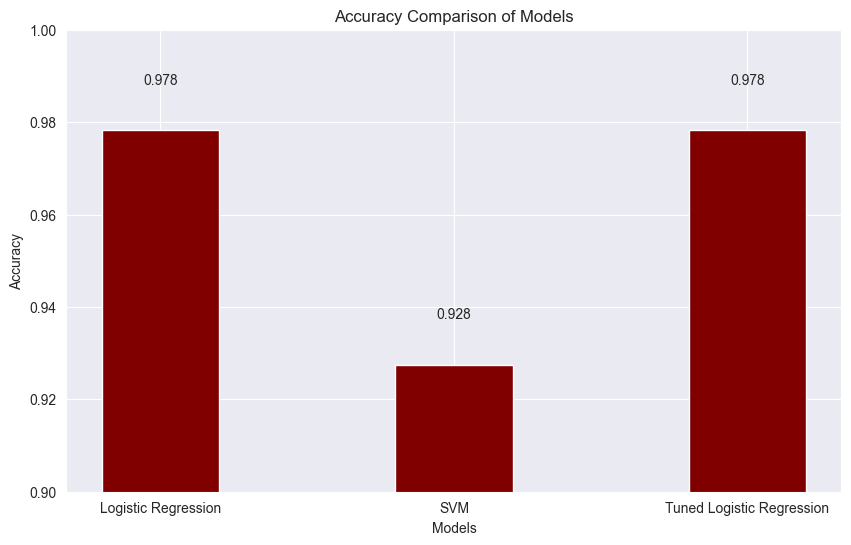

In [12]:
# graphs and stuff we could use in the documentation/presentation:
# model performance comparison
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Tuned Logistic Regression']
accuracies = [accuracy_score(y_val, lr_pred), 
              accuracy_score(y_val, svm_pred),
              accuracy_score(y_val, best_lr.predict(X_val_scaled))]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='maroon', width=0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models")
plt.ylim([0.9, 1])
for i, v in enumerate(accuracies):
    plt.text(i, v+0.01, f'{v:.3f}', ha='center')
plt.show()

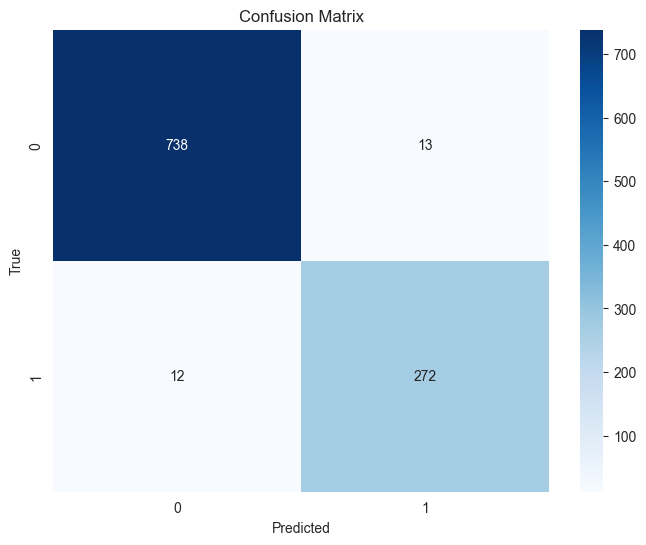

In [13]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, lr_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True') # idk
plt.title('Confusion Matrix')
plt.show()

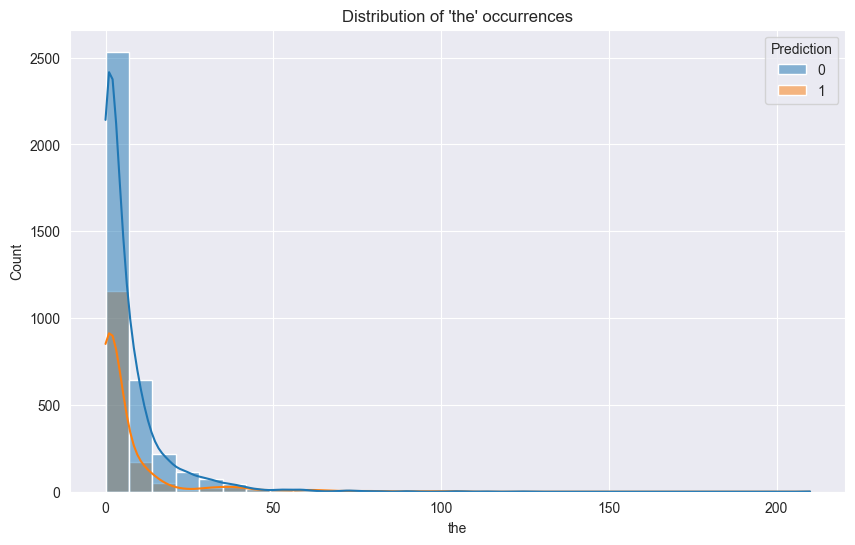

In [14]:
# distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="the", hue="Prediction", bins=30, kde=True)
plt.title("Distribution of 'the' occurrences") # Callback to the notebook for week 11 where it said the most common word in every american state was "the"
plt.show()

In [ ]:
# Heatmap purely for other correlations. Doesn't work for some reason on my machine, just freezes. Might be just a mac thing?
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()